# Data project - Group: De Slemme Programmeringsrotter

Imports and set magics:

In [1]:
# uncomment below if you need to install 
#%pip install git+https://github.com/alemartinello/dstapi
#%pip install pandas-datareader

# Import modules
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import Oliver

C:\Users\olive\AppData\Local\Temp\ipykernel_4424\1003518396.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Read and clean data

In [2]:
# Load data
ind = DstApi('FODIE') 
tabsum = ind.tablesummary(language='en')

# Quick overview of data. 
for variable in tabsum['variable name']:
   print(variable+':')
   display(ind.variable_levels(variable, language='en'))

Table FODIE: Live births by region, mothers ancestry, mothers country of origin, mothers citizenship, age of mother, sex of child and time
Last update: 2023-02-10T08:00:00
OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,101,Copenhagen
3,147,Frederiksberg
4,155,Dragør
...,...,...
100,773,Morsø
101,840,Rebild
102,787,Thisted
103,820,Vesthimmerlands


MOHERK:


,id,text
0,5,Persons of Danish origin
1,4,Immigrants
2,3,Descendant
3,0,Unknown origin


MOOPRIND:


,id,text
0,5100,Denmark
1,5122,Albania
2,5124,Andorra
3,5706,Belarus
4,5126,Belgium
...,...,...
236,5275,Vanuatu
237,5532,East Timor
238,5599,Pacific Islands
239,5103,Stateless


MOSTAT:


,id,text
0,5100,Denmark
1,5122,Albania
2,5124,Andorra
3,5706,Belarus
4,5126,Belgium
...,...,...
236,5275,Vanuatu
237,5532,East Timor
238,5599,Pacific Islands
239,5103,Stateless


MODERSALDER:


,id,text
0,10,10 years
1,11,11 years
2,12,12 years
3,13,13 years
4,14,14 years
5,15,15 years
6,16,16 years
7,17,17 years
8,18,18 years
9,19,19 years


BARNKON:


,id,text
0,D,Boys
1,P,Girls


Tid:


,id,text
0,2007,2007
1,2008,2008
2,2009,2009
3,2010,2010
4,2011,2011
5,2012,2012
6,2013,2013
7,2014,2014
8,2015,2015
9,2016,2016


We notice that 'OMRÅDE' can take the value 'All Denmark', the regions as well as the individual municipialities. We keep this in mind when further investigating, thus to not get duplicates across the categories (as a birth will be registered in both a municipiality, a region and all of Denmark).

In [3]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = ind._define_base_params(language='en')
params

{'table': 'fodie',
 'format': 'BULK',
 'lang': 'en',
 'variables': [{'code': 'OMRÅDE', 'values': ['*']},
  {'code': 'MOHERK', 'values': ['*']},
  {'code': 'MOOPRIND', 'values': ['*']},
  {'code': 'MOSTAT', 'values': ['*']},
  {'code': 'MODERSALDER', 'values': ['*']},
  {'code': 'BARNKON', 'values': ['*']},
  {'code': 'Tid', 'values': ['*']}]}

In [4]:
inc_api =pd.DataFrame(ind.get_data(params=params))
inc_api.sort_values(by=['TID', 'OMRÅDE', 'MODERSALDER', 'MOOPRIND', 'BARNKON'], inplace=True)

## Explore each data set

First examine how large the dataframe is:

In [5]:
print(inc_api.shape)

(412674, 8)


There seems to be 412674 rows (observations) and 8 columns (variables). The 7 rows are of course the groups as seem in section 'Read and clean data'. But what is the 8th?

First we would simply like to see a the data as a dataframe and what a row could look like:

In [6]:
inc_api.head(5)

,OMRÅDE,MOHERK,MOOPRIND,MOSTAT,MODERSALDER,BARNKON,TID,INDHOLD
300530,Aabenraa,Descendant,Germany,Denmark,17 years,Boys,2007,1
283911,Aabenraa,Immigrants,Armenia,Armenia,18 years,Girls,2007,1
280142,Aabenraa,Persons of Danish origin,Denmark,Denmark,18 years,Boys,2007,2
296304,Aabenraa,Persons of Danish origin,Denmark,Denmark,18 years,Girls,2007,2
300536,Aabenraa,Immigrants,Iraq,Iraq,18 years,Boys,2007,1


In [7]:
inc_api.tail(5)

,OMRÅDE,MOHERK,MOOPRIND,MOSTAT,MODERSALDER,BARNKON,TID,INDHOLD
393298,Ærø,Immigrants,Germany,Germany,36 years,Girls,2022,1
393313,Ærø,Persons of Danish origin,Denmark,Denmark,38 years,Girls,2022,1
393314,Ærø,Persons of Danish origin,Denmark,Denmark,41 years,Girls,2022,2
393315,Ærø,Persons of Danish origin,Denmark,Denmark,42 years,Boys,2022,1
393316,Ærø,Persons of Danish origin,Denmark,Denmark,44 years,Girls,2022,1


It seems the 8th the column (variable) is 'INDHOLD'. 'INDHOLD' seems to show the amount of births in the specific category of the other 7 variables. 

If we try to sort by 'INDHOLD' to examine the rows where 'INDHOLD' is large, we would expect to see the categories of 'Persons of Danish origin' and a age of the mother of roughly late twenties. We examine this:

In [8]:
inc_api.sort_values(by=['INDHOLD'], inplace=True)
inc_api.tail(5)

,OMRÅDE,MOHERK,MOOPRIND,MOSTAT,MODERSALDER,BARNKON,TID,INDHOLD
320700,All Denmark,Persons of Danish origin,Denmark,Denmark,29 years,Boys,2007,2359
314591,All Denmark,Persons of Danish origin,Denmark,Denmark,31 years,Girls,2007,2361
235054,All Denmark,Persons of Danish origin,Denmark,Denmark,29 years,Boys,2021,2371
303059,All Denmark,Persons of Danish origin,Denmark,Denmark,31 years,Boys,2007,2400
303060,All Denmark,Persons of Danish origin,Denmark,Denmark,30 years,Boys,2007,2410


As seen above that is what we found. Thus it seems that 'INDHOLD' is the birth count for the category.

We now have a dataset we can analyze.

# Analysis

Now we would like to analyze the data. First let us investigate amount of children born in a specific year, the gender of them and the origin of the mother. Let us use year 2008 as an example. See code below:

In [9]:
# Select only the category 'All Denmark' from the area in which the child was born.
# One should either choose 'All Denmark' or all of the individual municipialities when analyzing the data to get the levels correct, as a child is registered in both categories.
all_denmark_data = inc_api[inc_api['OMRÅDE'] == 'All Denmark']

# Select the data for the year 2008
all_denmark_data2 = all_denmark_data.set_index('TID')
year_data = all_denmark_data2.loc[all_denmark_data2.index.get_level_values('TID') == 2019]

# Group data by gender of child and origin of mother. 
grouped_data = year_data.groupby(['BARNKON', 'MOHERK'])['INDHOLD'].sum()

# check data out
print(grouped_data)

BARNKON  MOHERK                  
Boys     Descendant                   1156
         Immigrants                   5781
         Persons of Danish origin    24582
Girls    Descendant                   1037
         Immigrants                   5430
         Persons of Danish origin    23181
Name: INDHOLD, dtype: int64


Lets check if this is realistic. We then have total amount of live births in Denmark in 2019:

In [10]:
sum = grouped_data.sum()
print("The total amount of live births in Denmark in 2019 was: " + str(sum)) 

The total amount of live births in Denmark in 2019 was: 61167


 A quick check on the [DST website](https://www.dst.dk/en/Statistik/emner/borgere/befolkning/foedsler) shows that the amount of live births in Denmark in 2019 was 61167. It uses the same table as us, but this shows us that we have aggregated the categories correctly. Now to investigate amount of children born in a specific year, the gender of them and the origin of the mother. See code below:

In [11]:
import ipywidgets as widgets

# Define a function to update the plot based on the selected year
def update_plot(year):

    # Select the data for the selected year
    year_data = all_denmark_data.loc[all_denmark_data['TID'] == year]

    # Group data by gender of child and origin of mother.
    grouped_data = year_data.groupby(['MOHERK', 'BARNKON'])['INDHOLD'].sum()

    # Transform the data into a format suitable for a stacked bar chart
    stacked_data = grouped_data.unstack(level=0)

    # Create the stacked bar chart
    ax = stacked_data.plot(kind='bar', stacked=True)

    # Move the legend to the right of the plot
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Add chart labels and title
    plt.title(f'Number of Children Born in Denmark in {year} by Mother Origin and Gender')
    plt.xlabel('Mother Origin')
    plt.ylabel('Number of Children Born')

    # Add labels to the stacked bars
    for container in ax.containers:
        for i, bar in enumerate(container):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height / 2, int(height), ha='center', va='center', color='black', fontsize=12)

widgets.interact(update_plot,
                 year=widgets.IntSlider(value=2019, min=2008, max=2021, step=1, description='Year', continuous_update=False),
)

interactive(children=(IntSlider(value=2019, continuous_update=False, description='Year', max=2021, min=2008), …

<function __main__.update_plot(year)>

From the interactive plot above we can easily see that in general, more boys are born than girls. Furthermore, by far the largest part of births are by mothers of danish origin. Then by immigrants and then by descendants.

# Merge data sets

We would now like to create a interactive map of denmark where the total number of births show in each municipiality as a heatmap. 

To achieve this first find and load geodata of Denmark and municipalities. To do this use the package 'GeoPandas' and load a gml-dataset from Dataforsyningen - "ADMINISTRATIVE ENHEDER' from link: https://dataforsyningen.dk/data/992

<AxesSubplot: >

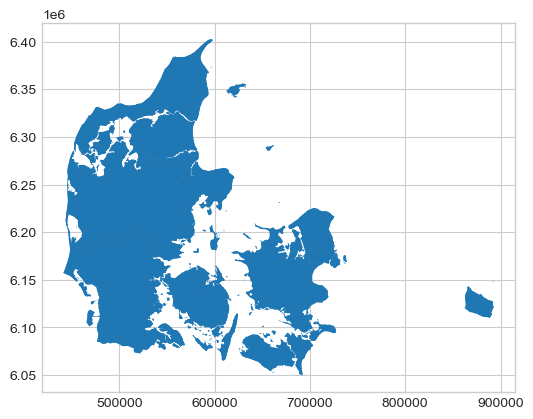

In [12]:
import geopandas as gpd

# Load the data into a GeoDataFrame
gdf = gpd.read_file("DK_AdministrativeUnit.gml")

# Visualize the data
gdf.plot()


Looks like we have correctly gotten data for denmark. Lets see what the data looks like:

In [13]:
gdf.head(1)

,gml_id,identifier,nationalCode,localId,namespace,versionId,LocalisedCharacterString,language,sourceOfName,pronunciation,text,script,residenceOfAuthority,beginLifespanVersion,boundary,upperLevelUnit,geometry
0,dk.au.389120,dk.au.389120,187,389120,https://geo.data.gov.dk/dataset/50f84f74-a55a-...,2018-01-22T09:00:00,Kommune,dan,None,None,Vallensbæk,Latn,None,2018-01-22T09:00:00,None,None,"MULTIPOLYGON (((710270.910 6171295.650, 710273..."


In [14]:
gdf.tail(1)

,gml_id,identifier,nationalCode,localId,namespace,versionId,LocalisedCharacterString,language,sourceOfName,pronunciation,text,script,residenceOfAuthority,beginLifespanVersion,boundary,upperLevelUnit,geometry
103,dk.au.389204,dk.au.389204,840,389204,https://geo.data.gov.dk/dataset/50f84f74-a55a-...,2018-01-22T09:00:00,Kommune,dan,None,None,Rebild,Latn,None,2018-01-22T09:00:00,None,None,"MULTIPOLYGON (((538851.620 6300672.150, 538851..."


It seems that 'nationalCode' is the municipality-ID to match the 'text' column that shows the municipality name. The geodata-polygon seems to be located in the 'geometry' column.

We clean up the dataset by only keeping those variables:

In [15]:
gdf = gdf.loc[:, ['nationalCode', 'text', 'geometry']]
gdf


,nationalCode,text,geometry
0,187,Vallensbæk,"MULTIPOLYGON (((710270.910 6171295.650, 710273..."
1,147,Frederiksberg,"MULTIPOLYGON (((721665.510 6177836.640, 721620..."
2,175,Rødovre,"MULTIPOLYGON (((716883.100 6174216.660, 716885..."
3,161,Glostrup,"MULTIPOLYGON (((715545.380 6175968.680, 715547..."
4,153,Brøndby,"MULTIPOLYGON (((716885.550 6174191.990, 716883..."
...,...,...,...
99,1082,Region Midtjylland,"MULTIPOLYGON (((548297.190 6268767.710, 548292..."
100,1081,Region Nordjylland,"MULTIPOLYGON (((476091.820 6285490.440, 476088..."
101,1085,Region Sjælland,"MULTIPOLYGON (((670291.600 6178301.520, 670291..."
102,1083,Region Syddanmark,"MULTIPOLYGON (((548131.600 6089172.750, 548130..."


From the above we can see that there also exists data for the different Regions. We are not interested in this data as for now and will therefore remove them such that rows are only for munipalities. To remove them start by investigating how many values from 'text' start with 'Region':

In [16]:
def unique(list):
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list:
        # check if the element starts with "Region" and if it exists in unique_list or not
        if x.startswith("Region") and x not in unique_list:
            unique_list.append(x)
    
    # print list
    for x in unique_list:
        print(x)


    return unique_list
        

list1 = gdf['text']
uniq = unique(list1)
print(uniq)


Region Hovedstaden
Region Midtjylland
Region Nordjylland
Region Sjælland
Region Syddanmark
['Region Hovedstaden', 'Region Midtjylland', 'Region Nordjylland', 'Region Sjælland', 'Region Syddanmark']


This is as expected. We know that Denmark has 5 regions. Now remove these regions from the dataset:

In [17]:
remove_list = ['Region Hovedstaden', 'Region Syddanmark']

# remove rows where text is in the remove_list using boolean indexing with ~ operator
gdf = gdf[~gdf['text'].isin(uniq)]
gdf

,nationalCode,text,geometry
0,187,Vallensbæk,"MULTIPOLYGON (((710270.910 6171295.650, 710273..."
1,147,Frederiksberg,"MULTIPOLYGON (((721665.510 6177836.640, 721620..."
2,175,Rødovre,"MULTIPOLYGON (((716883.100 6174216.660, 716885..."
3,161,Glostrup,"MULTIPOLYGON (((715545.380 6175968.680, 715547..."
4,153,Brøndby,"MULTIPOLYGON (((716885.550 6174191.990, 716883..."
...,...,...,...
94,851,Aalborg,"MULTIPOLYGON (((563346.420 6325579.150, 563336..."
95,376,Guldborgsund,"MULTIPOLYGON (((688764.820 6051969.090, 688758..."
96,390,Vordingborg,"MULTIPOLYGON (((710006.200 6101733.040, 710010..."
97,400,Bornholm,"MULTIPOLYGON (((891862.380 6126874.580, 891863..."


Thus we now have 99 rows. In Denmark there are currently only 98 *real* municipalities, but this is because the map contains geodata for 'Christiansø' which is a special administrative incident.

We now wish to *join* the births data onto this geodata. First prepare the births data:

In [18]:
# Select OMRÅDE column from the births data
list2 = inc_api['OMRÅDE']

# Find unique values in the births data that start with 'Region'
uniq2 = unique(list2)

# Append the category 'All Denmark' to the list.
uniq2.append('All Denmark')
print(uniq2)

Region Hovedstaden
Region Sjælland
Region Syddanmark
Region Nordjylland
Region Midtjylland
['Region Hovedstaden', 'Region Sjælland', 'Region Syddanmark', 'Region Nordjylland', 'Region Midtjylland', 'All Denmark']


As seen above the list 'uniq2' now contains all the valeus that are not municipalities from the births data dataset. Thus, we expect that there should now be 99 unique values for 'OMRÅDE' in the births dataset when removing the values from 'uniq2':

In [19]:
inc_api2 = inc_api[~inc_api['OMRÅDE'].isin(uniq2)]
unique_områder = inc_api['OMRÅDE'].nunique()
unique_områder2 = inc_api2['OMRÅDE'].nunique()
print("Amount of unique values when not removing 'Regions%' and 'All Denmark':  " + str(unique_områder))
print("Amount of unique values when removing 'Regions%' and 'All Denmark':      " + str(unique_områder2))
print("Where '%' indicates an arbitrary string following 'Region'.")


Amount of unique values when not removing 'Regions%' and 'All Denmark':  105
Amount of unique values when removing 'Regions%' and 'All Denmark':      99
Where '%' indicates an arbitrary string following 'Region'.


As expected. Now aggregate the births data into categories; Births, Municipality, Year so that we can properly merge it with the map data.

In [20]:
# Group data by gender of child and origin of mother. 
births = inc_api2.groupby(['OMRÅDE','TID'])['INDHOLD'].sum()
births_df = births.reset_index()

# A quick check tells us that aggregating for 2019 like earlier gives us the same amount of births
year_data = births.loc[births.index.get_level_values('TID') == 2019]

sum_births = grouped_data.sum()
print("The total amount of live births in Denmark in 2019 was: " + str(sum_births))


The total amount of live births in Denmark in 2019 was: 61167


Now merge the births data onto the geodata. First we are interested in seeing if any values do not have a match between 'text' and 'OMRÅDE'. As the string is not give nas e.g. a code we expect there might be differences.

In [21]:
merged_data = pd.merge(gdf, births_df[['OMRÅDE', 'TID', 'INDHOLD']], left_on='text', right_on='OMRÅDE', how='outer', indicator=True)

# Select the rows where _merge is equal to 'right_only'
unmatched_values = merged_data.loc[merged_data['_merge'] == 'right_only', 'OMRÅDE']

# Select only the unique non-matching values
unique_unmatched_values = unmatched_values.unique()

print(unique_unmatched_values)


['Copenhagen']


Thus it seems that for some reason the municipality for Copenhagen in the births data is written in english and not danish like the rest of the municipalities. This is fixed in the before the merge below:

In [22]:
births_df['OMRÅDE'] = births_df['OMRÅDE'].replace('Copenhagen', 'København')
merged_data = pd.merge(gdf, births_df[['OMRÅDE', 'TID', 'INDHOLD']], left_on='text', right_on='OMRÅDE', how='outer', indicator=True)

# Select the rows where _merge is equal to 'right_only'
unmatched_values = merged_data.loc[merged_data['_merge'] == 'right_only', 'OMRÅDE']

# Select only the unique non-matching values
unique_unmatched_values = unmatched_values.unique()

print(unique_unmatched_values)


[]


As seen above now we do not have any non-matched values.

Now before making a map select investigate the size of the data for different years:

In [23]:
years = [2005, 2008, 2010, 2015, 2019, 2022]

merged_data2 = merged_data.set_index('TID')

for year in years:
    subset = merged_data2[merged_data2.index.get_level_values('TID') == year]
    print("Number of rows and columns for year {}: {}".format(year, subset.shape))

Number of rows and columns for year 2005: (0, 6)
Number of rows and columns for year 2008: (99, 6)
Number of rows and columns for year 2010: (99, 6)
Number of rows and columns for year 2015: (98, 6)
Number of rows and columns for year 2019: (98, 6)
Number of rows and columns for year 2022: (99, 6)


Notice only 98 rows. This is likely as Christiansø has very few births (1 birth in 2022 and 0 in 2019). We see the difference beetween the values:

In [24]:
subset_2019 = merged_data2[merged_data2.index.get_level_values('TID') == 2019]
subset_2022 = merged_data2[merged_data2.index.get_level_values('TID') == 2022]

unique_2019 = set(subset_2019['text'].unique())
unique_2022 = set(subset_2022['text'].unique())

difference = unique_2022 - unique_2019

print("Unique values in 2022 but not 2019:", difference)


Unique values in 2022 but not 2019: {'Christiansø'}


Thus we have found the *anomaly* - and that it is nothing to worry about. Now we are going to make the map with geopandas and make it interactable such that one can choose year.

Before mapping we are going to create intervals for number of births for better display in a choropleth plot:

<AxesSubplot: >

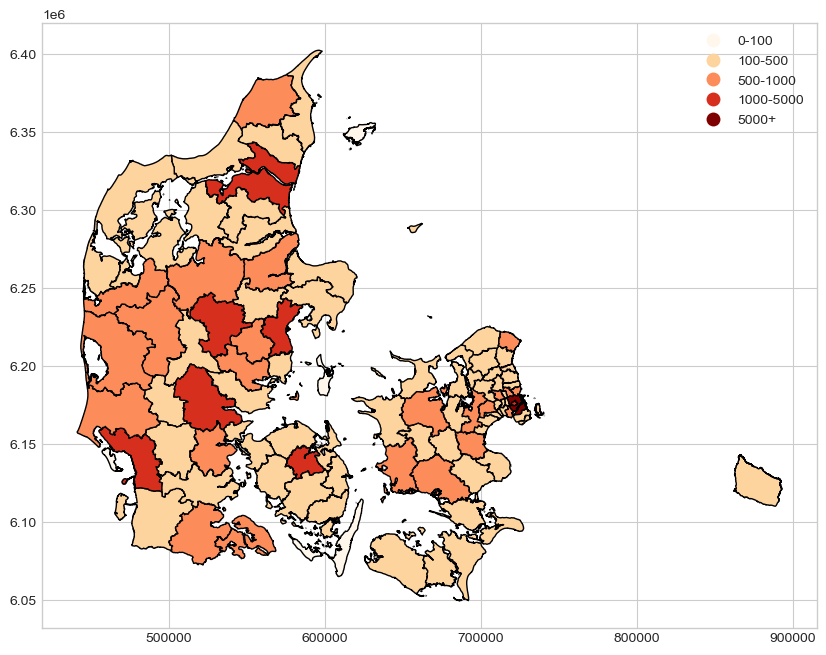

In [54]:
# Define the intervals and labels
bins = [0, 100, 500, 1000, 5000, 1000000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000+']


In [75]:
import ipywidgets as widgets

# Define a function to update the plot based on the selected year
def update_cholo(year):

    # Use cut() to assign labels to intervals
    subset_year =  merged_data2[merged_data2.index.get_level_values('TID') == year]

    subset = subset_year.copy()
    subset.loc[:, 'intervals'] = pd.cut(subset['INDHOLD'], bins=bins, labels=labels)
    
    ax = subset.plot("intervals",cmap='OrRd', legend = True, figsize=(14, 8), edgecolor='black')
    ax.axis('off')
    ax.set_title(f'Amount of live born children in {year}')
    
    # Adjust the legend size and position
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((0.85, 0.8))
    legend.prop.set_size(30)
    
    # Increase marker size in legend and add black border
    for line in legend.get_lines():
        line.set_markersize(15)
        line.set_markeredgewidth(1.5)
        line.set_markeredgecolor('black')
    
    # Set font size for all legend labels
    for label in legend.get_texts():
        label.set_fontsize(16)
    
    plt.show()
    plt.close()


widgets.interact(update_cholo,
                 year=widgets.IntSlider(value=2019, min=2008, max=2021, step=1, description='Year', continuous_update=False, layout=widgets.Layout(width='30%')),
)



interactive(children=(IntSlider(value=2019, continuous_update=False, description='Year', layout=Layout(width='…

<function __main__.update_cholo(year)>

# Conclusion